<a href="https://colab.research.google.com/github/s0ye0nyang/News-Recomendation-System/blob/main/word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!git clone https://github.com/kakao/khaiii.git
!pip install cmake
!mkdir build
!cd build && cmake /content/khaiii
!cd /content/build/ && make all
!cd /content/build/ && make resource
!cd /content/build && make install
!cd /content/build && make package_python
!pip install /content/build/package_python

fatal: destination path 'khaiii' already exists and is not an empty directory.
mkdir: cannot create directory ‘build’: File exists
-- [khaiii] fused multiply add option enabled
-- [hunter] Calculating Toolchain-SHA1
-- [hunter] Calculating Config-SHA1
-- [hunter] HUNTER_ROOT: /root/.hunter
-- [hunter] [ Hunter-ID: 70287b1 | Toolchain-ID: 02ccb06 | Config-ID: dffbc08 ]
-- [hunter] BOOST_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 1.68.0-p1)
-- Boost version: 1.68.0
-- [hunter] CXXOPTS_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 2.1.1-pre)
-- [hunter] EIGEN_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 3.3.5)
-- [hunter] FMT_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 4.1.0)
-- [hunter] GTEST_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 1.8.0-hunter-p11)
-- [hunter] NLOHMANN_JSON_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 3.3.0)
-- [hunter] SPDLOG_ROOT: /root/.hunte

In [8]:
!pip install kss

In [10]:
import gensim
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec

In [9]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ++

## 동사 원형

In [11]:
from khaiii import KhaiiiApi
import re
import kss

api = KhaiiiApi()
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NaverNews.csv',names=['a','b'], encoding='utf-8')
lines = data['a'].values
# print(lines)

tokenized_text = []
for i, line in enumerate(lines):
    if i > 100:    
        break
    line = line.strip()
    for sent in kss.split_sentences(line):
        tokenized_text.append(sent.strip())

punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-", "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', }


def clean_punc(text, punct, mapping):
    for p in mapping:
        text = text.replace(p, mapping[p])
    
    for p in punct:
        text = text.replace(p, f' {p} ')
    
    specials = {'\u200b': ' ', '…': ' ... ', '\ufeff': '', 'करना': '', 'है': ''}
    for s in specials:
        text = text.replace(s, specials[s])
    
    return text.strip()

cleaned_corpus = []
for sent in tokenized_text:
    cleaned_corpus.append(clean_punc(sent, punct, punct_mapping))

In [12]:
for i in range(0, 10):
    print(cleaned_corpus[i])

기사
/    /   flash 오류를 우회하기 위한 함수 추가function   -  flash  -  removeCallback (  )   {  } 지난해 10월부터 판매한 다이소 ,  사죄문 발표							생활용품 전문점 다이소의 인기 상품인 5000원짜리   '  아기 욕조  '  에서 기준치의 612배를 초과하는 환경 호르몬이 검출됐다 .
이를 두고 영유아를 키우는 부모들이 반발이 거세지면서 맘카페를 중심으로 제조업체를 상대로 한 집단소송 움직임까지 일고 있다 .
다이소 물빠짐 아기욕조 상품 이미지										산업통상자원부 국가기술표준원은 10일   "  대현화학공업이 제조한   '  아기 욕조 코스마 ( KHB  -  W5EF8A6 )   '   배수구 마개에서 기준치 612배가 넘는 프탈레이트계 가소제 성분이 검출됐다  "  며 제조사에 리콜 명령을 내렸다 .
이 제품은 지난해 10월부터 다이소에서   '  물빠짐 아기 욕조  '  라는 이름으로 판매됐다 .
다이소   '  물빠짐 아기 욕조  '   ( 제품번호 1019717 ) 는 싱크대에 딱 맞는 크기 ,  가격 대비 좋은 성능으로 큰 인기를 끌면서 맘카페 등에서 입소문을 탔고 ,    '  국민 아기욕조  '  로 불렸다 . 가성비 좋은 아기 욕조로 인기를 끌었던 다이소의   '  물빠짐 아기 욕조  '   ( 제조사 대현화학공업 ) 에서 기준치 612배의 환경호르몬이 검출됐다 .
/  다이소										배수구 마개에서 검출된 프탈레이트계 가소제는 폴리염화비닐 ( PVC )  재질 플라스틱을 부드럽게 만들기 위해 첨가하는 물질이다 .
장기간 노출되면 간과 신장에 치명적 손상을 줄 수 있다 .
환경 호르몬이 검출된 다이소 물빠짐 아기욕조의 배수구 마개 .  다이소   "  안전관리 못한 점 사죄  "   ...  조건 없이 환불							이 제품을 판매한 다이소는 11일부터 내년 1월 31일까지 다이소 매장에 해당 제품을 가지고 가면 구매 시점 ,  포장 개봉 및 사용 여부 ,

In [13]:
def clean_text(texts):
    corpus = []
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    for i in range(0, len(texts)):
        result = hangul.sub('', str(texts[i]))
        corpus.append(result)
    return corpus

basic_preprocessed_corpus = clean_text(cleaned_corpus)
print(basic_preprocessed_corpus)

significant_tags = ['NNG', 'NNP', 'NNB', 'VV', 'VA', 'VX', 'MAG', 'MAJ', 'XSV', 'XSA']

def pos_text(texts):
    corpus = []
    for sent in texts:
        pos_tagged = ''
        for word in api.analyze(sent):
            for morph in word.morphs:
                if morph.tag in significant_tags:
                    pos_tagged += morph.lex + '/' + morph.tag + ' '
        corpus.append(pos_tagged.strip())
    return corpus

pos_tagged_corpus = pos_text(basic_preprocessed_corpus)

['기사', '        오류를 우회하기 위한 함수 추가                  지난해 월부터 판매한 다이소   사죄문 발표생활용품 전문점 다이소의 인기 상품인 원짜리     아기 욕조    에서 기준치의 배를 초과하는 환경 호르몬이 검출됐다 ', '이를 두고 영유아를 키우는 부모들이 반발이 거세지면서 맘카페를 중심으로 제조업체를 상대로 한 집단소송 움직임까지 일고 있다 ', '다이소 물빠짐 아기욕조 상품 이미지산업통상자원부 국가기술표준원은 일     대현화학공업이 제조한     아기 욕조 코스마             배수구 마개에서 기준치 배가 넘는 프탈레이트계 가소제 성분이 검출됐다    며 제조사에 리콜 명령을 내렸다 ', '이 제품은 지난해 월부터 다이소에서     물빠짐 아기 욕조    라는 이름으로 판매됐다 ', '다이소     물빠짐 아기 욕조      제품번호   는 싱크대에 딱 맞는 크기   가격 대비 좋은 성능으로 큰 인기를 끌면서 맘카페 등에서 입소문을 탔고       국민 아기욕조    로 불렸다  가성비 좋은 아기 욕조로 인기를 끌었던 다이소의     물빠짐 아기 욕조      제조사 대현화학공업  에서 기준치 배의 환경호르몬이 검출됐다 ', '  다이소배수구 마개에서 검출된 프탈레이트계 가소제는 폴리염화비닐     재질 플라스틱을 부드럽게 만들기 위해 첨가하는 물질이다 ', '장기간 노출되면 간과 신장에 치명적 손상을 줄 수 있다 ', '환경 호르몬이 검출된 다이소 물빠짐 아기욕조의 배수구 마개   다이소     안전관리 못한 점 사죄       조건 없이 환불이 제품을 판매한 다이소는 일부터 내년 월 일까지 다이소 매장에 해당 제품을 가지고 가면 구매 시점   포장 개봉 및 사용 여부   영수증 유무와 상관없이 환불받을 수 있다고 했다 ', '다이소는 이날     물빠짐 아기욕조 리콜 건에 대해 사죄드립니다    라는 제목의 사죄문을 통해     유아용으로 사용되는 상품에 대한 안전관리를 철저하게 진행하지 못한 점에 대해 

In [14]:
for i in range(0, 10):
    print(pos_tagged_corpus[i])

기사/NNG
오류/NNG 우회/NNG 하/XSV 위하/VV 함수/NNG 추가/NNG 지난해/NNG 월/NNB 판매/NNG 하/XSV 다이소/NNG 사죄문/NNG 발표/NNG 생활용품/NNG 전문점/NNG 다이소/NNG 인기/NNG 상품/NNG 원/NNG 아기/NNG 욕조/NNG 기준/NNG 배/NNG 초과/NNG 하/XSV 환경/NNG 호르몬/NNG 검출/NNG 되/XSV
두/VV 영유아/NNG 키우/VV 부모/NNG 반발/NNG 거/VA 세/VV 지/VX 맘카페/NNG 중심/NNG 제조/NNG 업체/NNG 상대/NNG 하/VV 집단/NNG 소송/NNG 움직임/NNG 일/VV 있/VX
다이소/NNG 물/NNG 빠지/VV 아기욕조/NNG 상품/NNG 이미지산업/NNG 통상자원부/NNG 국가/NNG 기술/NNG 표준원/NNG 일/NNG 대현화학/NNP 공업/NNG 제조/NNG 하/XSV 아기/NNG 욕조/NNG 코스마/NNG 배수구/NNP 마개/NNG 기준치/NNG 배/NNG 넘/VV 프탈레이트/NNG 가소제/NNG 성분/NNG 검출/NNG 되/XSV 제조사/NNG 리콜/MAG 명령/NNG 내리/VV
제품/NNG 지난해/NNG 월/NNB 다이소/NNG 물/NNG 빠지/VV 아기/NNG 욕조/NNG 이름/NNG 판매/NNG 되/XSV
다이소/NNG 물/NNG 빠지/VV 아기/NNG 욕조/NNG 제품/NNG 번호/NNG 늘/VV 싱크대/NNG 딱/MAG 맞/VV 크기/NNG 가격/NNG 대비/NNG 좋/VA 성능/NNG 크/VA 인기/NNG 끌/VV 맘카페/NNG 등/NNB 입소문/NNG 타/VV 국민/NNG 아기욕조/NNG 불리/VV 가성비/NNG 좋/VA 아기/NNG 욕조/NNG 인기/NNG 끌/VV 다이소/NNG 물/NNG 빠지/VV 아기/NNG 욕조/NNG 제조사/NNG 대/NNG 현화학/NNP 공업/NNG 기준치/NNG 배/NNG 환경/NNG 호르몬/NNG 검출/NNG 되/XSV
다/NNG 이소배/NNP 수구/NNG 마개/NNG 검출/NNG 되/XSV 프탈레

In [15]:
# 동사원형을 찾는 규칙 정의
p1 = re.compile('[가-힣A-Za-z0-9]+/NN. [가-힣A-Za-z0-9]+/XS.') # 동사
p2 = re.compile('[가-힣A-Za-z0-9]+/NN. [가-힣A-Za-z0-9]+/XSA [가-힣A-Za-z0-9]+/VX') # 명사
p3 = re.compile('[가-힣A-Za-z0-9]+/VV') # 형용사
p4 = re.compile('[가-힣A-Za-z0-9]+/VX') # 부사

data = open('/content/drive/My Drive/Colab Notebooks/exceptionwords.txt', 'r', encoding='utf-8')
excep_words = data.read().split()

def stemming_text(text):
    corpus = []
    for sent in text:
        if sent in excep_words:
           corpus.append(sent)
        
        ori_sent = sent
        mached_terms = re.findall(p1, ori_sent)
        for terms in mached_terms:
            ori_terms = terms
            modi_terms = ''
            for term in terms.split(' '):
                lemma = term.split('/')[0]
                tag = term.split('/')[-1]
                modi_terms += lemma
            modi_terms += '다/VV'
            ori_sent = ori_sent.replace(ori_terms, modi_terms)
        
        mached_terms = re.findall(p2, ori_sent)
        for terms in mached_terms:
            ori_terms = terms
            modi_terms = ''
            for term in terms.split(' '):
                lemma = term.split('/')[0]
                tag = term.split('/')[-1]
                if tag != 'VX':
                    modi_terms += lemma
            modi_terms += '다/VV'
            ori_sent = ori_sent.replace(ori_terms, modi_terms)

        mached_terms = re.findall(p3, ori_sent)
        for terms in mached_terms:
            ori_terms = terms
            modi_terms = ''
            for term in terms.split(' '):
                lemma = term.split('/')[0]
                tag = term.split('/')[-1]
                modi_terms += lemma
            if '다' != modi_terms[-1]:
                modi_terms += '다'
            modi_terms += '/VV'
            ori_sent = ori_sent.replace(ori_terms, modi_terms)

        mached_terms = re.findall(p4, ori_sent)
        for terms in mached_terms:
            ori_terms = terms
            modi_terms = ''
            for term in terms.split(' '):
                lemma = term.split('/')[0]
                tag = term.split('/')[-1]
                modi_terms += lemma
            if '다' != modi_terms[-1]:
                modi_terms += '다'
            modi_terms += '/VV'
            ori_sent = ori_sent.replace(ori_terms, modi_terms)
        ori_list = ori_sent.split(' ')
        temp = [[ori] for ori in ori_list]
        print(temp[0])
        corpus.extend(temp)
        # print("orisent:",corpus,'\n')
    return corpus

In [16]:
stemming_corpus = stemming_text(pos_tagged_corpus)

['기사/NNG']
['오류/NNG']
['두다/VV']
['다이소/NNG']
['제품/NNG']
['다이소/NNG']
['다/NNG']
['장기간/NNG']
['환경/NNG']
['다이/NNG']
['다이소/NNG']
['다이/NNG']
['다이/NNG']
['다이/NNG']
['다이소/NNG']
['법무/NNG']
['변호사/NNG']
['그러다/VV']
['아이/NNG']
['부모/NNG']
['글/NNG']
['다이소/NNG']
['금번/NNG']
['코로/NNG']
['년/NNB']
['물/NNG']
['다이소/NNG']
['상품/NNG']
['다이소/NNG']
['다/NNP']
['아울러/MAG']
['다시/MAG']
['년/NNB']
['조선일보/NNP']
['오류/NNG']
['정부/NNG']
['문제/NNG']
['초저/NNP']
['해당/NNG']
['산업/NNG']
['프탈레이트/NNG']
['산업부/NNG']
['아이/NNG']
['다이/NNG']
['다이/NNG']
['다이소/NNG']
['다이/NNG']
['다이/NNG']
['다이/NNG']
['맘카페선/NNG']
['법무/NNG']
['변호사/NNG']
['그러다/VV']
['아이/NNG']
['부모/NNG']
['글/NNG']
['아이/NNG']
['네티즌/NNG']
['또/MAG']
['오경묵/NNP']
['조선일보/NNP']
['오류/NNG']
['욕조/NNG']
['산업/NNG']
['가운데/NNG']
['리/NNP']
['욕조/NNG']
['기준/NNG']
['산업/NNG']
['하/XSA']
['하지만/MAJ']
['산업부/NNG']
['경기/NNG']
['법무/NNG']
['제품하다/VV']
['인터넷/NNG']
['믿다/VV']
['해당/NNG']
['일/NNG']
['코스마/NNG']
['변호사/NNG']
['이번/NNG']
['안전/NNG']
['아기욕조/NNG']
['안전/NNG']
['전기/NNG']
['안전인증/NNG']
['안전/NNG']
['공급자/NNG'

In [17]:
hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')

data = open('/content/drive/My Drive/Colab Notebooks/stopwords-ko.txt', 'r', encoding='utf-8') # 불용어 파일
stop_words = data.read().split()

def remove_stopword_text(text):
    corpus = []
    for word in text:
        word = word[0]
        word = hangul.sub('', word)

        if word not in stop_words:
          corpus.append([word])
    return corpus

#SW = define_stopwords("stopwords-ko.txt")
removed_stopword_corpus = remove_stopword_text(stemming_corpus)

print(removed_stopword_corpus)



[['우회하다'], ['위하다'], ['함수'], ['추가'], ['지난해'], ['판매하다'], ['다이소'], ['사죄문'], ['발표'], ['생활용품'], ['전문점'], ['다이소'], ['인기'], ['상품'], ['원'], ['아기'], ['욕조'], ['기준'], ['배'], ['초과하다'], ['환경'], ['호르몬'], ['검출되다'], ['두다'], ['영유아'], ['키우다'], ['부모'], ['반발'], ['세다'], ['지다'], ['맘카페'], ['중심'], ['제조'], ['업체'], ['상대'], ['집단'], ['소송'], ['움직임'], ['일다'], ['다이소'], ['물'], ['빠지다'], ['아기욕조'], ['상품'], ['이미지산업'], ['통상자원부'], ['국가'], ['기술'], ['표준원'], ['대현화학'], ['공업'], ['제조하다'], ['아기'], ['욕조'], ['코스마'], ['배수구'], ['마개'], ['기준치'], ['배'], ['넘다'], ['프탈레이트'], ['가소제'], ['성분'], ['검출되다'], ['제조사'], ['리콜'], ['명령'], ['내리다'], ['제품'], ['지난해'], ['다이소'], ['물'], ['빠지다'], ['아기'], ['욕조'], ['이름'], ['판매되다'], ['다이소'], ['물'], ['빠지다'], ['아기'], ['욕조'], ['제품'], ['번호'], ['늘다'], ['싱크대'], ['맞다'], ['크기'], ['가격'], ['대비'], ['좋'], ['성능'], ['크'], ['인기'], ['끌다'], ['맘카페'], ['입소문'], ['국민'], ['아기욕조'], ['불리다'], ['가성비'], ['좋'], ['아기'], ['욕조'], ['인기'], ['끌다'], ['다이소'], ['물'], ['빠지다'], ['아기'], ['욕조'], ['제조사'], ['대'], ['현화학'], ['공업'], ['기준치'], ['배'], ['환경'], [

In [18]:
from gensim.models import Word2Vec

# word_list = ' '.join(removed_stopword_corpus).split(' ')

model = Word2Vec(removed_stopword_corpus,         # 리스트 형태의 데이터
                 sg=1,         # 0: CBOW, 1: Skip-gram
                 size=100,     # 벡터 크기
                 window=3,     # 고려할 앞뒤 폭(앞뒤 3단어)
                 min_count=3,  # 사용할 단어의 최소 빈도(3회 이하 단어 무시)
                 workers=2)

model.save('word2vec.model')

In [32]:
model.wv.most_similar('현대오토')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('월일', 0.2942017614841461),
 ('한편', 0.2827913165092468),
 ('영입', 0.2726581394672394),
 ('처리하다', 0.26850736141204834),
 ('제주', 0.2613598704338074),
 ('많이', 0.2612189054489136),
 ('시기', 0.25959312915802),
 ('간수치', 0.2591549754142761),
 ('리콜명령', 0.2511616349220276),
 ('최초', 0.24921543896198273)]

In [33]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False
model_name = 'word2vec.model'
model = g.Word2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])
# X_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


1618
[ 1.6479230e-03 -4.4781533e-03 -1.9270775e-03  2.7803117e-03
 -3.5327650e-03 -3.6378838e-03  2.4683219e-03  8.7698652e-05
  3.3018116e-03  3.9079031e-03]


In [34]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

(100, 2)

In [36]:
df.head(20)

,x,y
우회하다,-5.618292,-1.017502
위하다,-3.467315,-0.526461
함수,-2.297003,-0.598784
추가,-0.988657,-0.787588
지난해,-3.630995,0.795274
판매하다,-3.724675,-1.982967
다이소,-2.934924,-0.552119
사죄문,-4.028188,-0.957940
발표,-3.816887,2.726847
생활용품,-5.570416,-0.036376


In [ ]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
print(len(font_list))
font_list

In [ ]:
print('# 설정 되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

In [ ]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

print ('설정 파일 위치: ', mpl.matplotlib_fname())

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체개수
print(len(font_list))
font_list

In [ ]:
pip install -U matplotlib

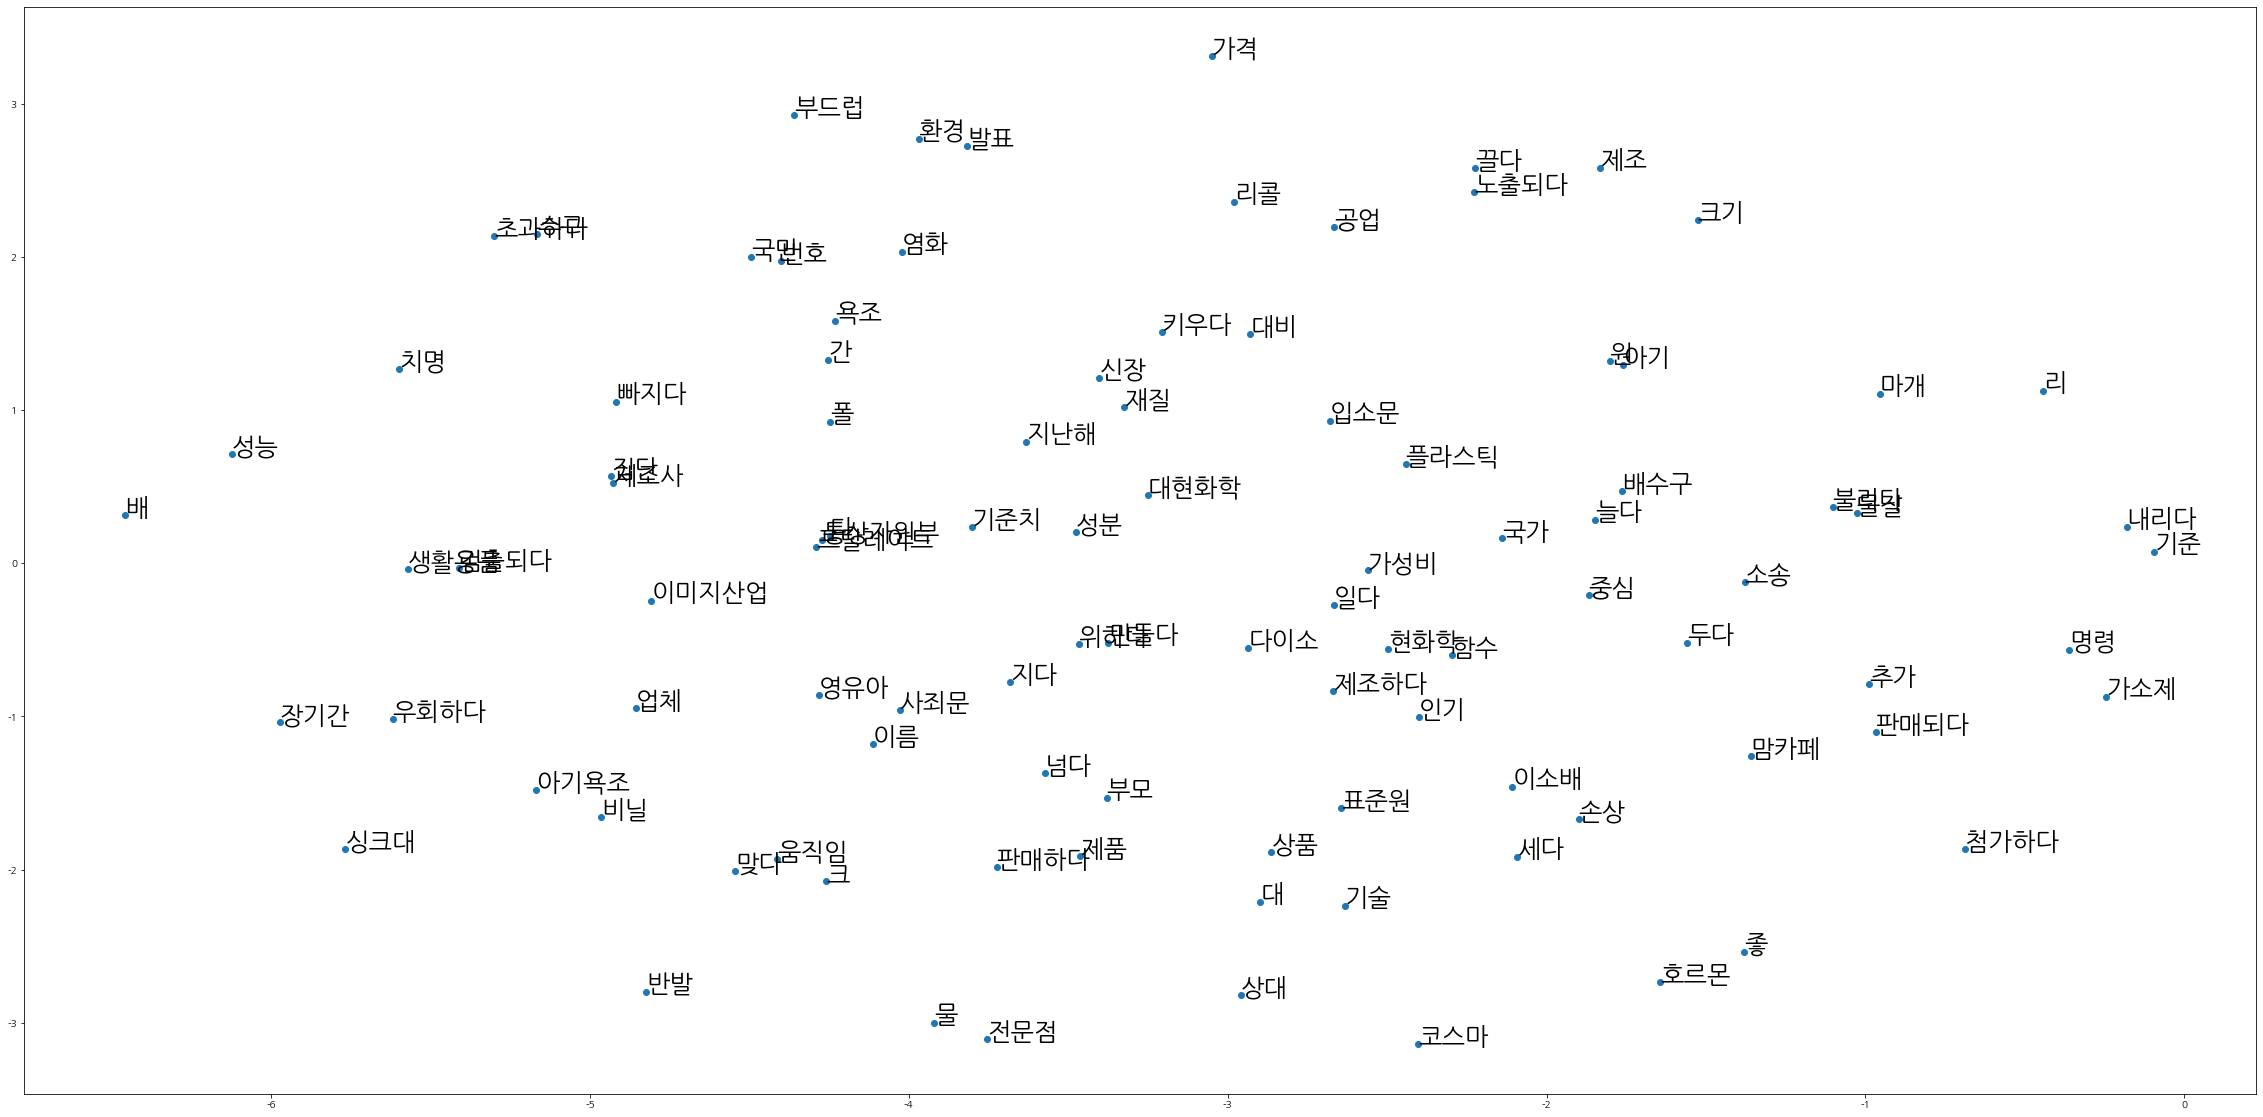

In [39]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)
plt.rcParams['font.family'] = 'NanumGothic'


path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=25,fontproperties=fontprop)
plt.show()